# Métodos Montecarlo Fing 2022 - Entrega 6

**Autor**: Carlos M. Martinez, mayo 2022. 

**Email**: carlosm@fing.edu.uy, carlos@cagnazzo.uy

## Parte (a) Generar muestras uniformemente distribuidas en un círculo

Según Fishman (1996) es posible generar muestras uniformemente distribuidas en un círculo siguiendo los siguientes pasos:

1. Generar una variable aleatoria r, de distribucion $F_r(x) = x^2$ para $0<=x<=1$ y 0 para cualquier otro $x$
1. Se generan dos v.a. normales  $N(0,1)$ (normales con media cero y varianza 1), $Z_1$ y $Z_2$
1. Se calculan dos nuevas v.a. a saber: $X_1 = rZ_1/sqrt(Z_1^2+Z_2^2)$ y $X_2 = rZ_2/sqrt(Z_1^2+Z_2^2)$ 

In [1]:
import random
import math
import tabulate
import time
from IPython.core.display import HTML
random.seed()

def sampleUnitCircle():
    """
    Generar muestras uniformes dentro del circulo unidad
    """
    random.seed()
    # paso 1
    u_r = random.uniform(0,1)
    r = math.sqrt(u_r)

    # paso 2
    Z1 = random.gauss(0,1)
    Z2 = random.gauss(0,1)

    # paso 3
    X1 = r*Z1 / math.sqrt(Z1**2+Z2**2)
    X2 = r*Z2 / math.sqrt(Z1**2+Z2**2)

    return (X1, X2)
# end def

def sampleCircle(xc, yc, r):
    """
    Muestrear un circulo de centro (xc, yc) y radio r
    """
    (x,y) = sampleUnitCircle()

    xr = xc + (r)*x
    yr = yc + (r)*y

    return (xr, yr)
# end def sampleCircle

for n in range(0,10):
    print(sampleUnitCircle())

(0.5403155518887598, -0.049926258448015966)
(0.4349082657348928, -0.12129723014571048)
(-0.6162114967440325, 0.5602907716881181)
(0.14454783561349124, -0.8819872537777563)
(-0.553848897344865, 0.18635866934942055)
(-0.6874739779446307, 0.7172849213894109)
(-0.7270339839326542, -0.49318915490894394)
(-0.16273681657279687, -0.395263983325348)
(-0.25132824509065765, 0.3006889755855703)
(-0.24257451033206892, -0.9405520382880127)


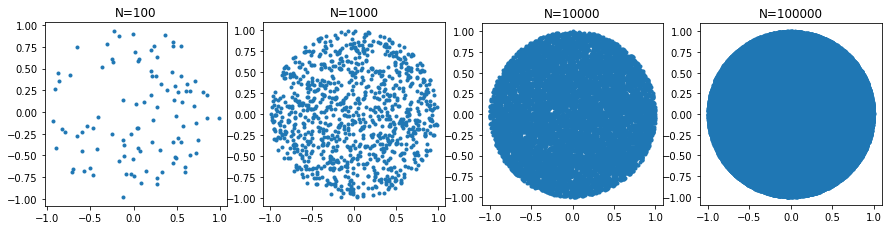

In [2]:
# visualizo el resultado

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4, figsize=(15,15))

for n in range(0,4):
    x = []
    y = []
    np = 10**(n+2)
    for i in range(0,np):
        p = sampleCircle(0, 0, 1)
        x.append(p[0])
        y.append(p[1])
    # end for i
    ax[n].set_title(f"N={np}")
    ax[n].set_aspect(1, adjustable='box')
    ax[n].plot(x,y,'.')
# end for n


## Parte(b) Ejercicio 6.1 BIS

Se idealiza una montaña como un cono inscrito en una region cuadrada de lado 1 km. La base de la montaña es circular, con centro en (0.5, 0.5) y radio r = 0.4km, y la altura es H = 8km. La altura de cada punto (x, y) de la montaña está dada por la función:

f (x, y) = H − H/r × sqrt((x − 0.5)2 + (y − 0.5)2), en la zona definida por el círculo, y 0 fuera del círculo.

El volumen total de la montaña (en km cúbicos) puede verse como la integral de la función altura en la región.

**Parte a:**

Escribir un programa para calcular el volúmen por Monte Carlo. Realizar 10^6 replicaciones y estimar el valor de ζ y el error cometido (con nivel de confianza 0.95), utilizando como criterio la aproximación normal.

_Las muestras se tomarán únicamente del círculo base de la montaña.

In [3]:

import cm2c.fing.mmc.integral as mmci
import cm2c.fing.mmc.utils as mmcutils
reloj_ppal = mmcutils.timeit()
mmci.version()

'Integracion MMC v0.1.3 - Carlos Martinez abril-mayo 2022'

Ahora, para resolver el problema del volumen de la montaña defino una función en R2 que me devuelva la altura de la montaña abstracta:

In [4]:
H = 8.0 # altura en km
r = 0.4 # radio de la base en km
n = 10**6 # cantidad de muestras para la parte (a)
delta = 0.05

import math

def Montana(x):
    """
    x es un vector de dos elementos
    devuelve la altura estimada
    """
    
    # calculo distancia al centro
    d = math.sqrt( (x[0]-0.5)**2 + (x[1]-0.5)**2 )
    
    if d > 0.4:
        return 0.0
    else:
        return H - (H/r)*d
## end def Montana

(estimZ, estimV, _, _) = mmci.integracionMonteCarlo(Montana, 2, n, mmcutils.sortearPuntoRN)

(icn0, icn1) = mmci.intConfianzaAproxNormal(estimZ, estimV, n, delta)

epsilon_est = estimZ-icn0

print("ESTIMACION MUESTREANDO R^2")
print("Volumen estimado por MMC {:.5f} km3".format(estimZ))
print("Varianza estimada : {:.5e}".format(estimV))
print("Intervalo de confianza para delta {} : ({:.5f}, {:.5f}) ".format(delta, icn0, icn1))
print("Error estimado: {:.5e}".format(epsilon_est))

ESTIMACION MUESTREANDO R^2
Volumen estimado por MMC 1.33938 km3
Varianza estimada : 3.56430e-06
Intervalo de confianza para delta 0.05 : (1.33568, 1.34308) 
Error estimado: 3.70029e-03


In [5]:

(estimZ2, estimV2, _, _) = mmci.integracionMonteCarloStieltjes(lambda x: (math.pi)*r**2*Montana(x), 2, n, lambda x: sampleCircle(0.5, 0.5, 0.4))

(icn02, icn12) = mmci.intConfianzaAproxNormal(estimZ2, estimV2, n, delta)

epsilon_est2 = estimZ2-icn02

print("ESTIMACION MUESTREANDO Unicamente el circulo base")
print("Volumen estimado por MMC {:.5f} km3".format(estimZ2))
print("Varianza estimada : {:.5e}".format(estimV2))
print("Intervalo de confianza para delta {} : ({:.5f}, {:.5f}) ".format(delta, icn02, icn12))
print("Error estimado: {:.5e}".format(epsilon_est2))

ESTIMACION MUESTREANDO Unicamente el circulo base
Volumen estimado por MMC 1.34150 km3
Varianza estimada : 8.99661e-07
Intervalo de confianza para delta 0.05 : (1.33964, 1.34336) 
Error estimado: 1.85903e-03


## Conclusiones

Para obtener el resultado correcto transformamos la función a integrar, en este caso alcanza con dividir la función H por la densidad de probabilidad (que es igual al área del círculo base).

La generación de muestras es significativamente más lenta, siendo el tiempo de ejecución de 1.5 segundos para el muestreo uniforme en $[0,1]^2$ y de casi 20s para el muestreo uniforme en el círculo unidad.

Como ventajas vemos que obtenemos menor error y menor varianza para la misma cantidad de muestras.

## Datos adicionales y referencias

### Información acerca del software y hardware utilizados

**Software:**
 - Python 3.8.10 corriendo en Windows WSL2 (Windows Subsystem for Linux)
 - Jupyter Notebook 
 
**Librerias:** 
 - scipy norm
 - pathos multiprocessing (para parelilizar ejecuciones)
 
**Hardware:**

 - PC Windows 11, con WSL2
 - CPU Intel Core i5 10400F (6 cores)
 - 16 GB de RAM

In [6]:
print(f"%% FIN - tiempo total de ejecución {reloj_ppal.lap():.3f}s")

%% FIN - tiempo total de ejecución 21.789s


## Código de las funciones desarrolladas

Adjunto en el archivo _"gen_distrib_stieltjes.py.pdf"_.